<a href="https://colab.research.google.com/github/carvalheirafc/jupyter_backups/blob/main/digital_image_processing/wiener_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import cv2
import scipy.stats as st
from scipy import fftpack
import matplotlib.pyplot as plt


In [6]:
def gaussian_kernel(kernlen=21, nsig=3):
  '''
  H(u, v) = fft(self)
  Returns a 2d Gaussian Kernel
  https://stackoverflow.com/questions/29731726/how-to-calculate-a-gaussian-kernel-matrix-efficiently-in-numpy/29731818#29731818

  '''
  x = np.linspace(-nsig, nsig, kernlen+1)
  kern1d = np.diff(st.norm.cdf(x))
  kern2d = np.outer(kern1d, kern1d) 

  return kern2d/kern2d.sum()

In [38]:
def power_spectrum_alt(image):
  '''
  Sf(u, v)
  '''
  F1 = fftpack.fft2(image)
  F2 = fftpack.fftshift(F1)

  return (np.abs(F2) ** 2)


In [46]:
image = cv2.imread('baixo.jpg', cv2.IMREAD_GRAYSCALE)

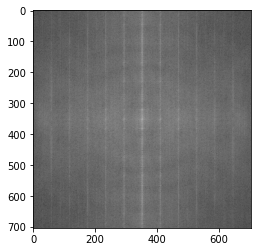

In [50]:
specs = power_spectrum_alt(image)
plt.imshow(np.log10(specs), cmap='gray')